#### Dataset

In [8]:
# Datset: banknotes.csv
# Location: https://mitu.co.in/dataset

#### Import all libraries

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#### Read the data

In [6]:
df = pd.read_csv('banknotes.csv')

In [7]:
df

,Variance,Skewness,Curtosis,Entropy,Class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


#### Separate the input and output variables

In [10]:
x = df.drop('Class', axis = 1)
y = df['Class']

#### Output variable analysis

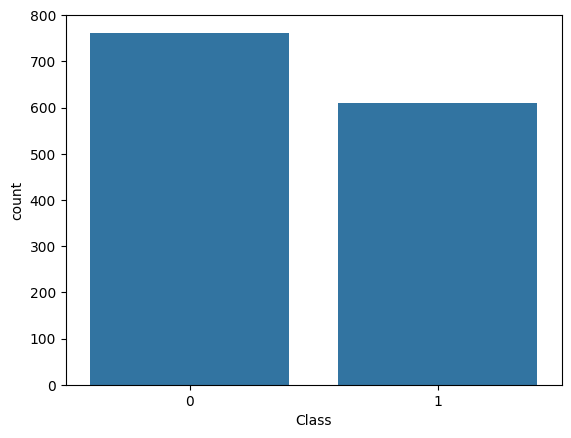

In [13]:
sns.countplot(x = y);

In [14]:
y.value_counts()

Class
0    762
1    610
Name: count, dtype: int64

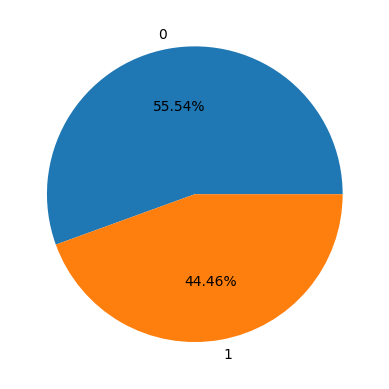

In [15]:
plt.pie(y.value_counts(), autopct='%2.2f%%', labels=[0,1]);

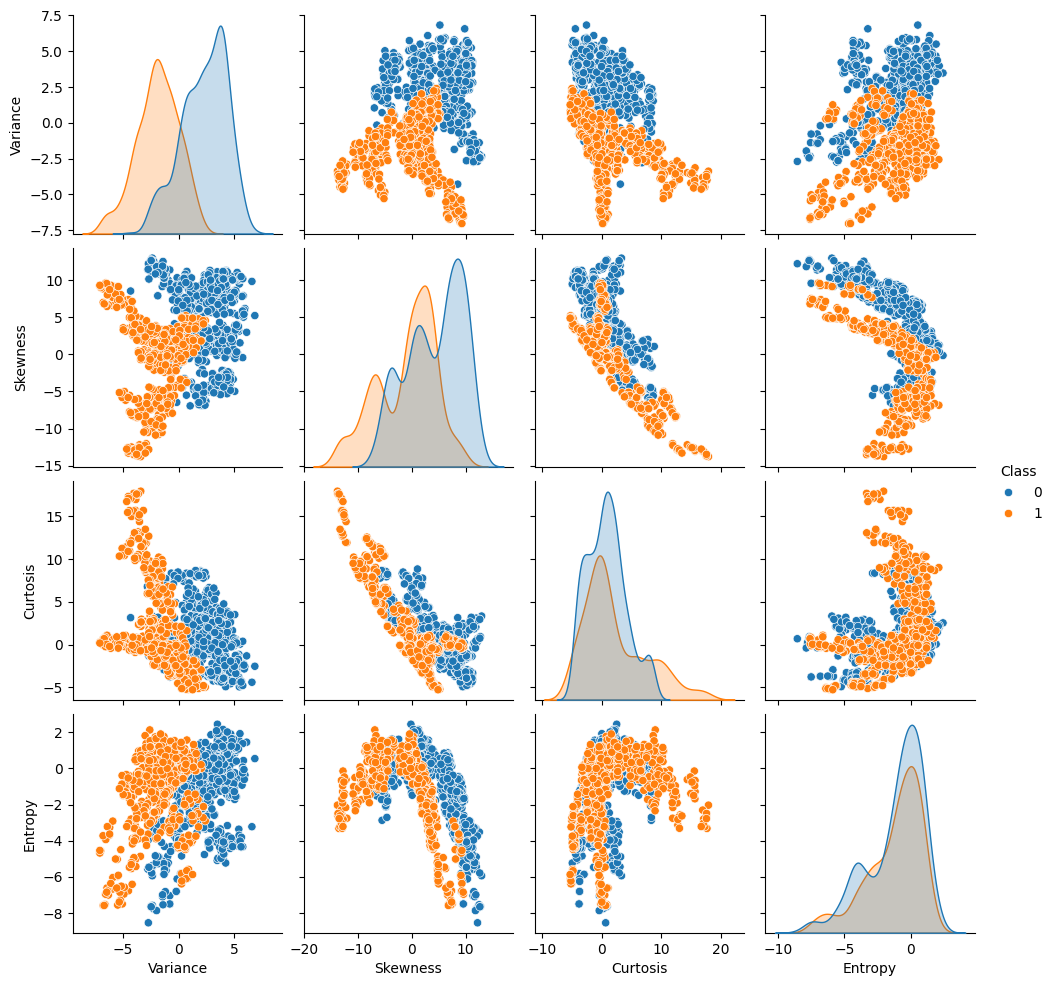

In [16]:
sns.pairplot(df, hue='Class')

#### Cross Validation

In [19]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

In [21]:
x_train.shape

(1029, 4)

In [22]:
x_test.shape

(343, 4)

#### Build the model

In [24]:
from sklearn.tree import DecisionTreeClassifier

In [25]:
classifier = DecisionTreeClassifier(random_state=0)

In [28]:
classifier.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

#### Plot the tree

In [30]:
from sklearn.tree import plot_tree

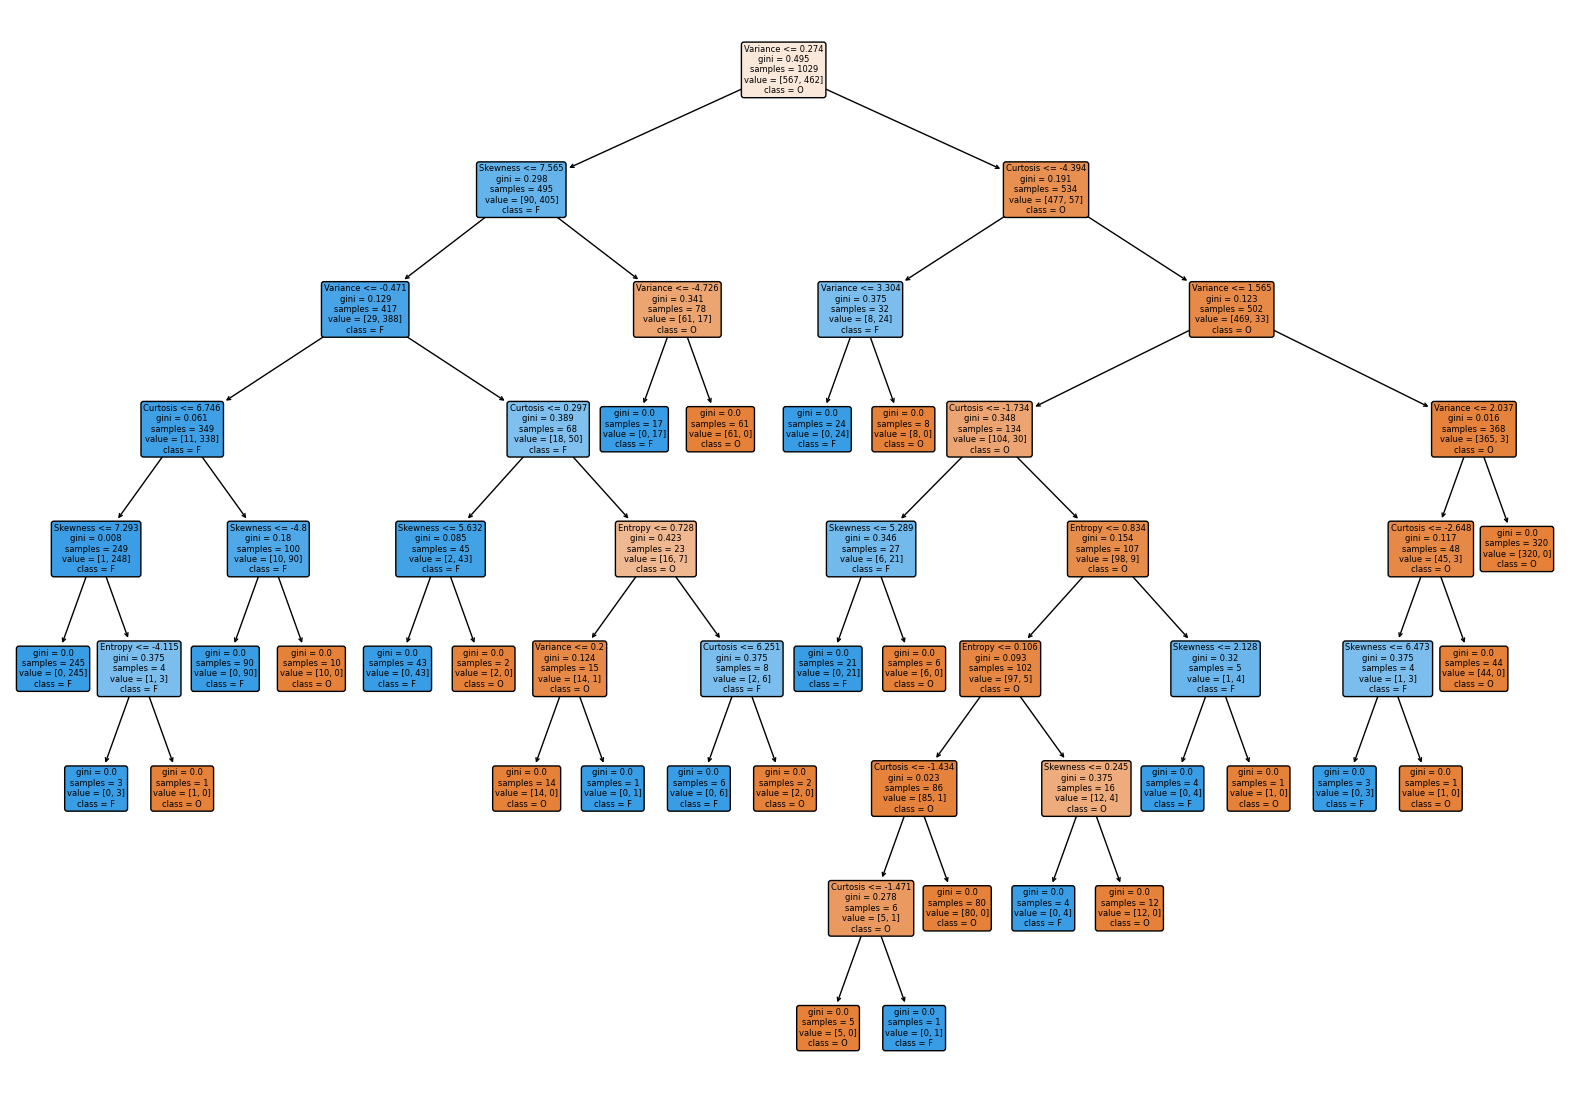

In [39]:
plt.figure(figsize=(20,14))
plot_tree(classifier, fontsize=6, filled=True, feature_names=list(x.columns),
         class_names=['O','F'], rounded=True);
plt.savefig('mytree.png')

#### Performance Evaluation

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, classification_report

In [42]:
y_pred = classifier.predict(x_test)

In [43]:
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,

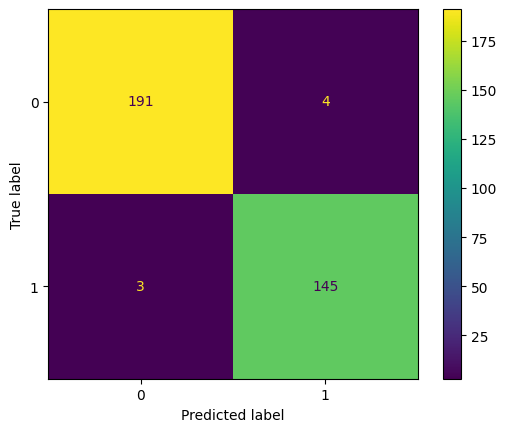

In [44]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [45]:
accuracy_score(y_test, y_pred)

0.9795918367346939

In [49]:
new = pd.DataFrame({
    'Variance': [3.86600, 0.32924, -3.56370], 
    'Skewness': [-2.63830, -4.45520, -8.38270],
    'Curtosis': [1.9242, 4.5718, 12.3930],
    'Entropy': [0.10645, -0.98880, -1.28230]
})

In [50]:
new

,Variance,Skewness,Curtosis,Entropy
0,3.86600,-2.6383,1.9242,0.10645
1,0.32924,-4.4552,4.5718,-0.98880
2,-3.56370,-8.3827,12.3930,-1.28230


In [51]:
classifier.predict(new)

array([0, 0, 1])